## Data Dictionary
_Note: For binary variables: `1` = true and `0` = false._

| Column                                                                                                                                                                                                          | Explanation                                                                                                                            |   |   |   |
|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------|---|---|---|
| is_canceled                                                                                                                                                                                                     | Binary variable indicating whether a booking was canceled                                                                              |   |   |   |
| lead_time                                                                                                                                                                                                       | Number of days between booking date and arrival date                                                                                   |   |   |   |
| arrival_date_week_number, arrival_date_day_of_month, arrival_date_month                                                                                                                                         | Week number, day date, and month number of arrival date                                                                                |   |   |   |
| stays_in_weekend_nights, stays_in_week_nights                                                                                                                                                                   | Number of weekend nights (Saturday and Sunday) and weeknights (Monday to Friday) the customer booked                                   |   |   |   |
| adults, children, babies                                                                                                                                                                                        | Number of adults, children, babies booked for the stay                                                                                 |   |   |   |
    | is_repeated_guest                                                                                                                                                                                               | Binary variable indicating whether the customer was a repeat guest                                                                     |   |   |   |
| previous_cancellations                                                                                                                                                                                          | Number of prior bookings that were canceled by the customer                                                                            |   |   |   |
| previous_bookings_not_canceled                                                                                                                                                                                  | Number of prior bookings that were not canceled by the customer                                                                        |   |   |   |
| required_car_parking_spaces                                                                                                                                                                                     | Number of parking spaces requested by the customer                                                                                     |   |   |   |
| total_of_special_requests                                                                                                                                                                                       | Number of special requests made by the customer                                                                                        |   |   |   |
| avg_daily_rate                                                                                                                                                                                                  | Average daily rate, as defined by dividing the sum of all lodging transactions by the total number of staying nights                   |   |   |   |
| booked_by_company                                                                                                                                                                                               | Binary variable indicating whether a company booked the booking                                                                        |   |   |   |
| booked_by_agent                                                                                                                                                                                                 | Binary variable indicating whether an agent booked the booking                                                                         |   |   |   |
| hotel_City                                                                                                                                                                                                      | Binary variable indicating whether the booked hotel is a "City Hotel"                                                                  |   |   |   |
| hotel_Resort                                                                                                                                                                                                    | Binary variable indicating whether the booked hotel is a "Resort Hotel"                                                                |   |   |   |
| meal_BB                                                                                                                                                                                                         | Binary variable indicating whether a bed & breakfast meal was booked                                                                   |   |   |   |
| meal_HB                                                                                                                                                                                                         | Binary variable indicating whether a half board meal was booked                                                                        |   |   |   |
| meal_FB                                                                                                                                                                                                         | Binary variable indicating whether a full board meal was booked                                                                        |   |   |   |
| meal_No_meal                                                                                                                                                                                                    | Binary variable indicating whether there was no meal package booked                                                                    |   |   |   |
| market_segment_Aviation, market_segment_Complementary, market_segment_Corporate, market_segment_Direct, market_segment_Groups, market_segment_Offline_TA_TO, market_segment_Online_TA, market_segment_Undefined | Indicates market segment designation with a value of 1. "TA"= travel agent, "TO"= tour operators                                       |   |   |   |
| distribution_channel_Corporate, distribution_channel_Direct, distribution_channel_GDS, distribution_channel_TA_TO, distribution_channel_Undefined                                                               | Indicates booking distribution channel with a value of 1. "TA"= travel agent, "TO"= tour operators, "GDS" = Global Distribution System |   |   |   |
| reserved_room_type_A, reserved_room_type_B, reserved_room_type_C, reserved_room_type_D, reserved_room_type_E, reserved_room_type_F, reserved_room_type_G, reserved_room_type_H, reserved_room_type_L            | Indicates code of room type reserved with a value of 1. Code is presented instead of designation for anonymity reasons                 |   |   |   |
| deposit_type_No_Deposit                                                                                                                                                                                         | Binary variable indicating whether a deposit was made                                                                                  |   |   |   |
| deposit_type_Non_Refund                                                                                                                                                                                         | Binary variable indicating whether a deposit was made in the value of the total stay cost                                              |   |   |   |
| deposit_type_Refundable                                                                                                                                                                                         | Binary variable indicating whether a deposit was made with a value under the total stay cost                                           |   |   |   |
| customer_type_Contract                                                                                                                                                                                          | Binary variable indicating whether the booking has an allotment or other type of contract associated to it                             |   |   |   |
| customer_type_Group                                                                                                                                                                                             | Binary variable indicating whether the booking is associated to a group                                                                |   |   |   |
| customer_type_Transient                                                                                                                                                                                         | Binary variable indicating whether the booking is not part of a group or contract, and is not associated to other transient booking    |   |   |   |
| customer_type_Transient-Party                                                                                                                                                                                   | Binary variable indicating whether the booking is transient, but is associated to at least another transient booking                   |   |   |   |

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql
import numpy as np

# Data Exploration

In [2]:
# Create a connection to the database
conn = sql.connect('database.sqlite')

In [3]:
# Query the database to get the names of the tables
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(query, conn)
tables

,name
0,hotel_bookings


In [4]:
#insert csv as table
df = pd.read_csv('hotel_bookings.csv')
df.to_sql('hotel_bookings', conn, if_exists='replace', index=False)

119390

In [5]:
tables = pd.read_sql_query(query, conn)
tables

,name
0,hotel_bookings


In [6]:
query = "SELECT * FROM hotel_bookings LIMIT 5;"
df = pd.read_sql_query(query, conn)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,None,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,None,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,None,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,None,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,None,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
pd.read_sql_query("Select reservation_status ,count(reservation_status) from hotel_bookings group by reservation_status", conn)

,reservation_status,count(reservation_status)
0,Canceled,43017
1,Check-Out,75166
2,No-Show,1207


In [8]:
pd.read_sql_query("Select count(*) from hotel_bookings where reserved_room_type != assigned_room_type", conn)

,count(*)
0,14917


In [9]:
pd.read_sql_query("Select reservation_status ,count(reservation_status) from hotel_bookings where reserved_room_type != assigned_room_type group by reservation_status", conn)

,reservation_status,count(reservation_status)
0,Canceled,594
1,Check-Out,14115
2,No-Show,208


In [10]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Data Visualization

E:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='agent', ylabel='Count'>

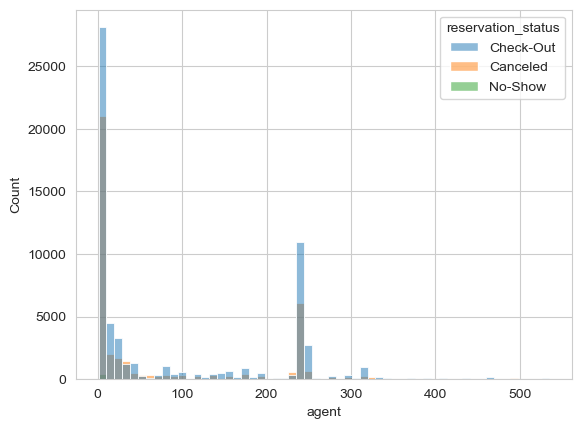

In [12]:
sns.histplot(data=df, x='agent', hue='reservation_status')

E:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Count')

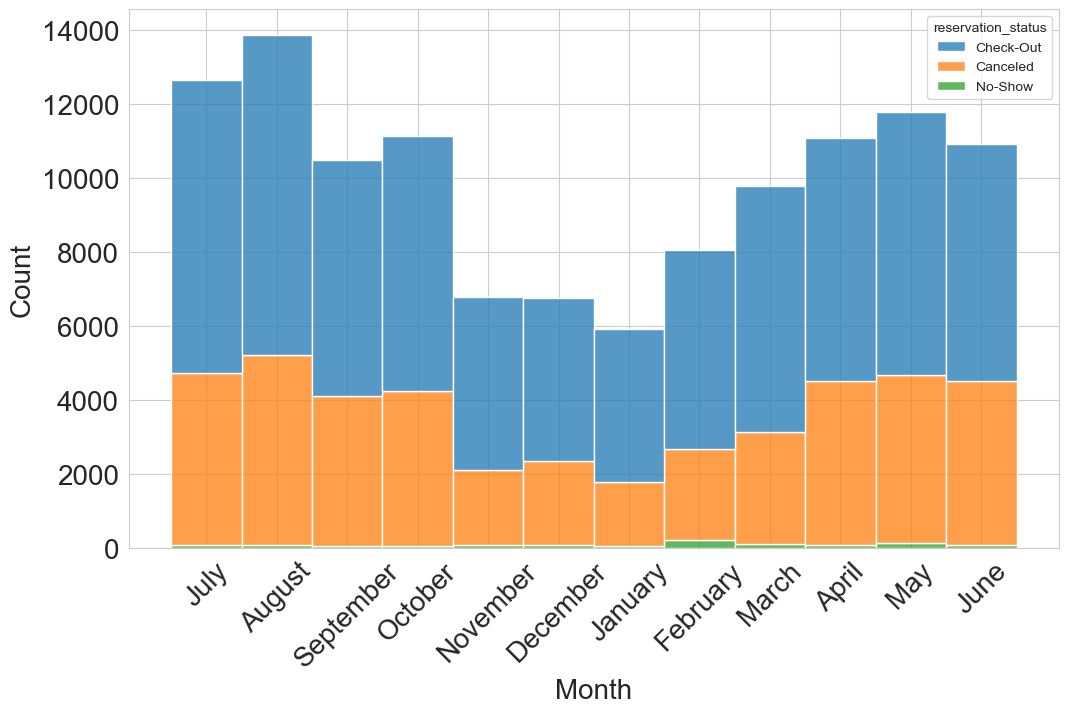

In [13]:
plt.figure(figsize=(12, 7))
sns.histplot(data=df, x='arrival_date_month', hue='reservation_status', multiple='stack')
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.xlabel("Month", fontsize=20)
plt.ylabel("Count", fontsize=20)

E:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(array([   0., 1000., 2000., 3000., 4000., 5000.]),
 [Text(0, 0.0, '0'),
  Text(0, 1000.0, '1000'),
  Text(0, 2000.0, '2000'),
  Text(0, 3000.0, '3000'),
  Text(0, 4000.0, '4000'),
  Text(0, 5000.0, '5000')])

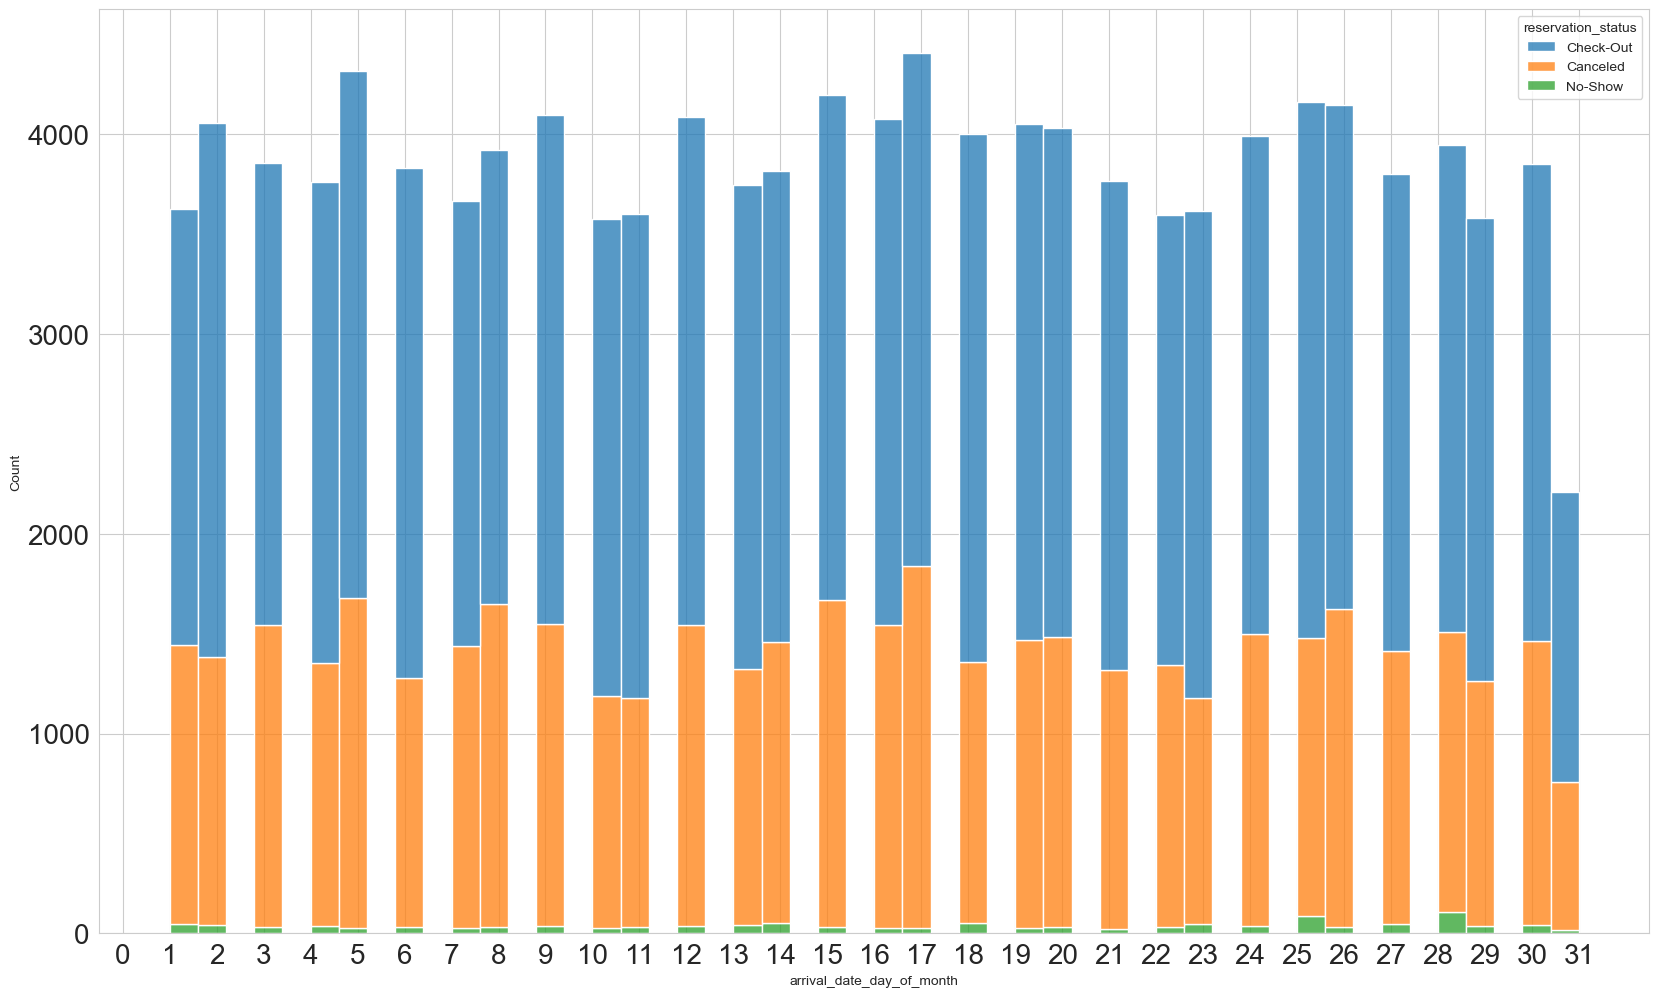

In [14]:
fig = plt.figure(figsize=(20, 12))
sns.histplot(data=df, x='arrival_date_day_of_month', hue='reservation_status', multiple='stack')
plt.xticks(fontsize=20, ticks=range(0, 32))
plt.yticks(fontsize=20)

E:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='hotel', ylabel='Count'>

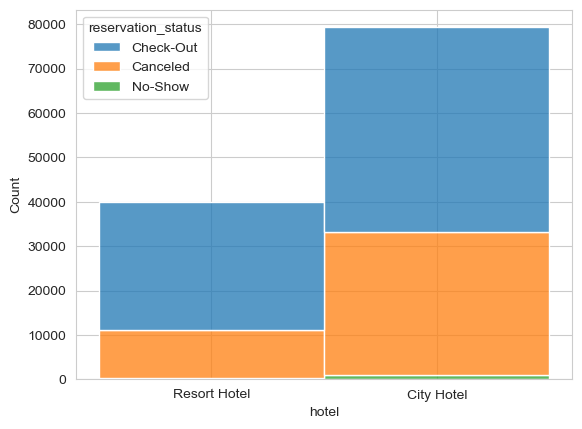

In [15]:
sns.histplot(data=df, x='hotel', hue='reservation_status', multiple='stack')

In [16]:
df.dropna(subset=['children'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119386 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119386 non-null  object 
 1   is_canceled                     119386 non-null  int64  
 2   lead_time                       119386 non-null  int64  
 3   arrival_date_year               119386 non-null  int64  
 4   arrival_date_month              119386 non-null  object 
 5   arrival_date_week_number        119386 non-null  int64  
 6   arrival_date_day_of_month       119386 non-null  int64  
 7   stays_in_weekend_nights         119386 non-null  int64  
 8   stays_in_week_nights            119386 non-null  int64  
 9   adults                          119386 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119386 non-null  int64  
 12  meal                 

Text(0, 0.5, 'Number of Nights')

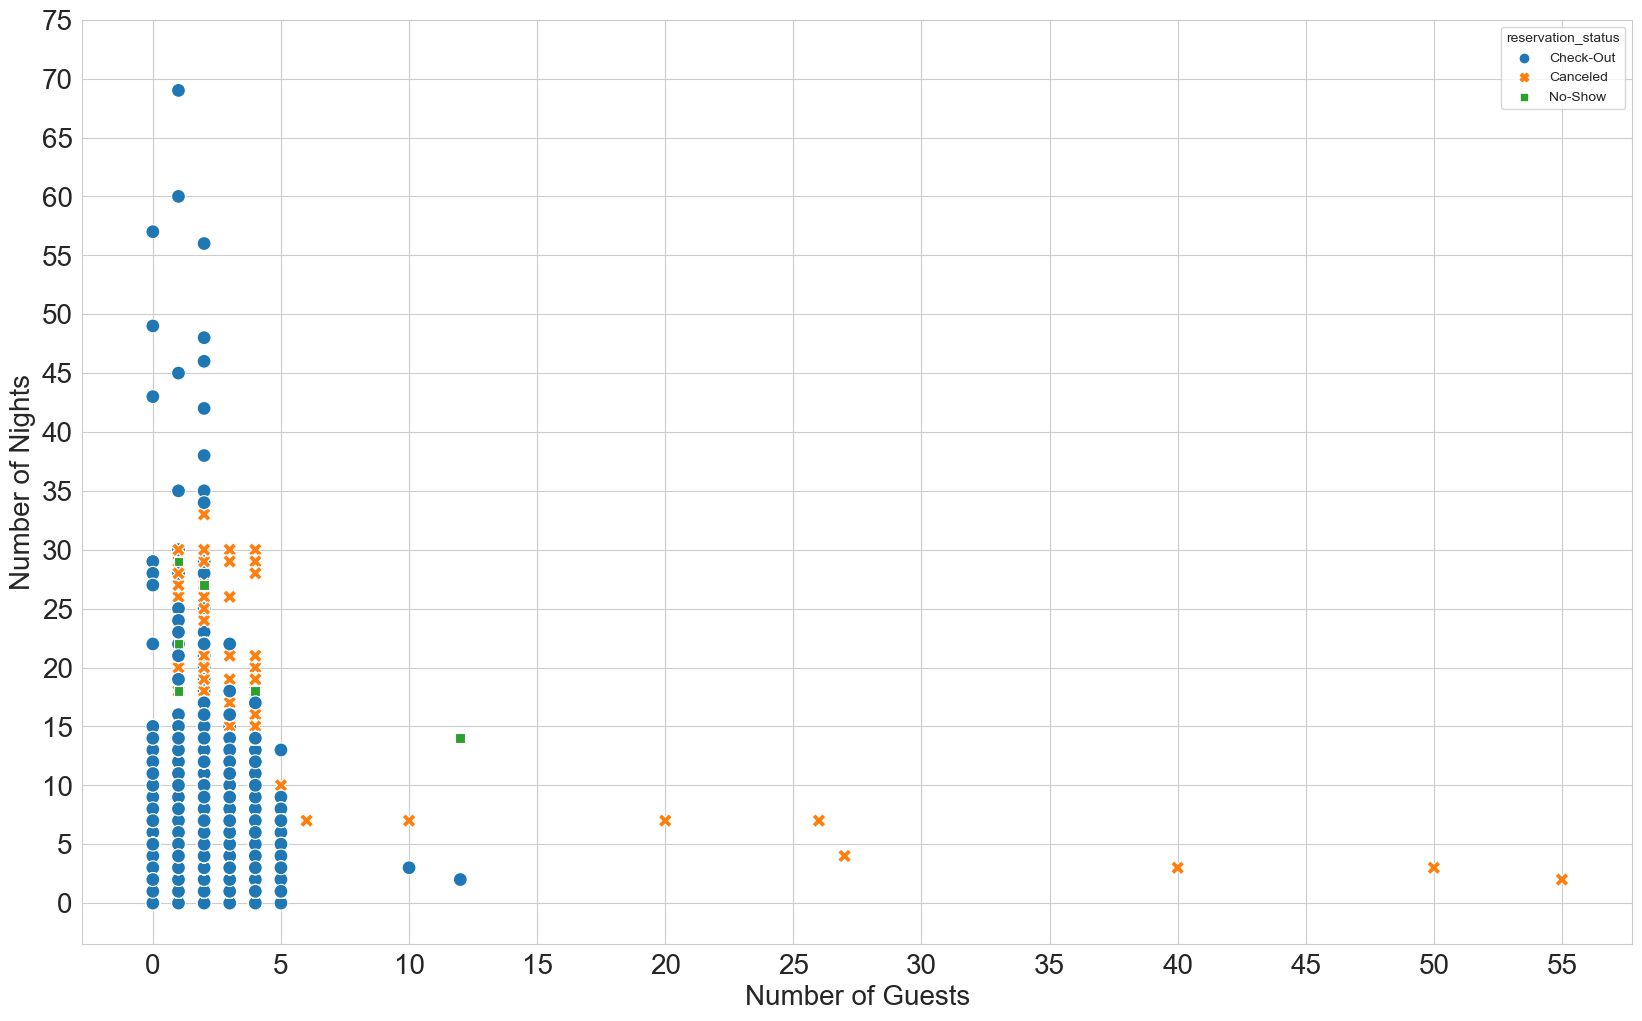

In [17]:
plt.figure(figsize=(20, 12))
sns.scatterplot(x=df['adults']+df['children']+df['babies'], y=df['stays_in_week_nights']+df['stays_in_weekend_nights'], style=df['reservation_status'], hue=df['reservation_status'], s=100)
plt.xticks(ticks=range(0, 60, 5), fontsize=20)
plt.yticks(ticks=range(0, 80, 5), fontsize=20)
plt.xlabel("Number of Guests", fontsize=20)
plt.ylabel("Number of Nights", fontsize=20)

E:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


([<matplotlib.axis.XTick at 0x237225c22d0>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

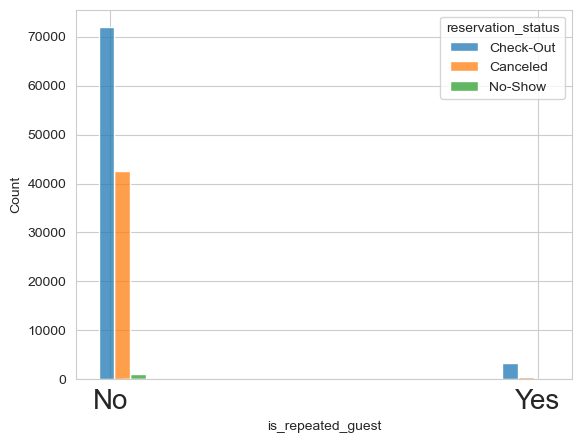

In [18]:
sns.histplot(data=df, x='is_repeated_guest', hue='reservation_status', shrink=2, multiple='dodge')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], fontsize=20)

In [19]:
df.drop(columns=['company', 'agent', 'reservation_status_date', 'country'], inplace=True)

In [20]:
months = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
df['arrival_date_month'] = df['arrival_date_month'].map(months)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out


E:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Count')

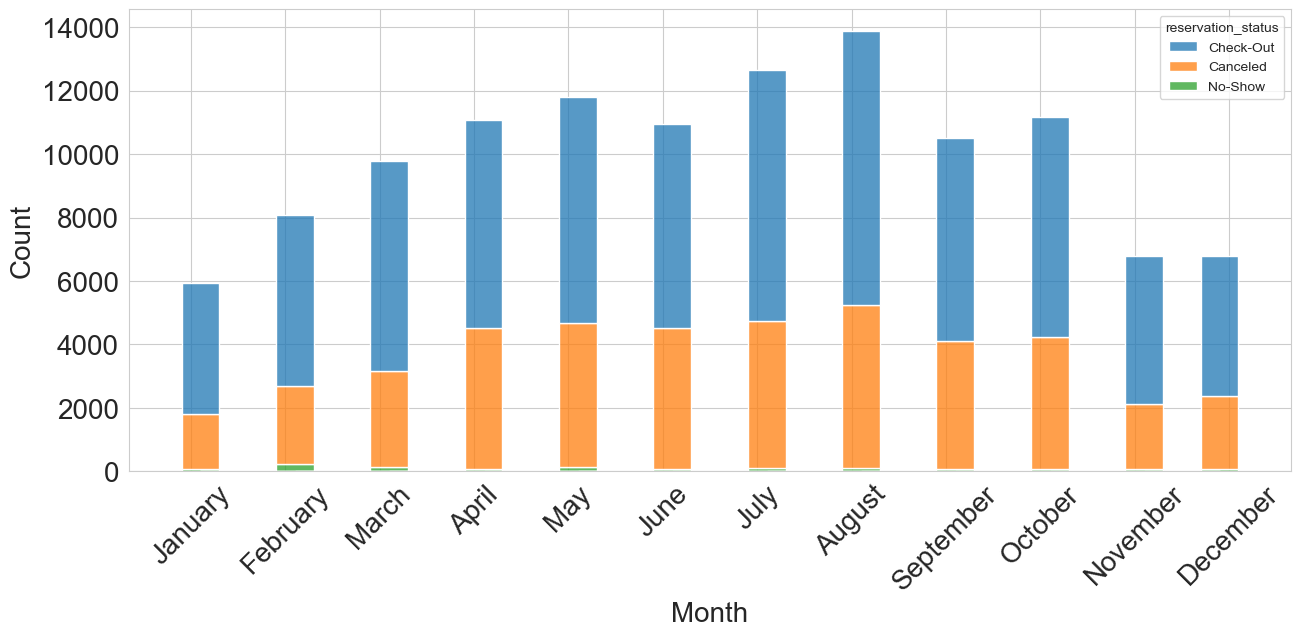

In [21]:
plt.figure(figsize=(15, 6))
sns.histplot(data=df, x='arrival_date_month', hue='reservation_status', multiple='stack', shrink=2)
plt.xticks(fontsize=20, rotation=45, ticks=range(1, 13), labels=months.keys())
plt.yticks(fontsize=20)
plt.xlabel("Month", fontsize=20)
plt.ylabel("Count", fontsize=20)

# Data Preprocessing

In [22]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                  int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
days_in_waiting_list                int64
customer_type                     

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = {}
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = le.fit_transform(df[i])
        labels[i] = le.classes_
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,1,0,342,2015,7,27,1,0,0,2,...,2,2,3,0,0,2,0.0,0,0,1
1,1,0,737,2015,7,27,1,0,0,2,...,2,2,4,0,0,2,0.0,0,0,1
2,1,0,7,2015,7,27,1,0,1,1,...,0,2,0,0,0,2,75.0,0,0,1
3,1,0,13,2015,7,27,1,0,1,1,...,0,0,0,0,0,2,75.0,0,0,1
4,1,0,14,2015,7,27,1,0,2,2,...,0,0,0,0,0,2,98.0,0,1,1


In [24]:
labels

{'hotel': array(['City Hotel', 'Resort Hotel'], dtype=object),
 'meal': array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object),
 'market_segment': array(['Aviation', 'Complementary', 'Corporate', 'Direct', 'Groups',
        'Offline TA/TO', 'Online TA'], dtype=object),
 'distribution_channel': array(['Corporate', 'Direct', 'GDS', 'TA/TO', 'Undefined'], dtype=object),
 'reserved_room_type': array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'L', 'P'], dtype=object),
 'assigned_room_type': array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'P'],
       dtype=object),
 'deposit_type': array(['No Deposit', 'Non Refund', 'Refundable'], dtype=object),
 'customer_type': array(['Contract', 'Group', 'Transient', 'Transient-Party'], dtype=object),
 'reservation_status': array(['Canceled', 'Check-Out', 'No-Show'], dtype=object)}

# Some more data visualization

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5]),
 [Text(0, 0.5, 'hotel'),
  Text(0, 1.5, 'is_canceled'),
  Text(0, 2.5, 'lead_time'),
  Text(0, 3.5, 'arrival_date_year'),
  Text(0, 4.5, 'arrival_date_month'),
  Text(0, 5.5, 'arrival_date_week_number'),
  Text(0, 6.5, 'arrival_date_day_of_month'),
  Text(0, 7.5, 'stays_in_weekend_nights'),
  Text(0, 8.5, 'stays_in_week_nights'),
  Text(0, 9.5, 'adults'),
  Text(0, 10.5, 'children'),
  Text(0, 11.5, 'babies'),
  Text(0, 12.5, 'meal'),
  Text(0, 13.5, 'market_segment'),
  Text(0, 14.5, 'distribution_channel'),
  Text(0, 15.5, 'is_repeated_guest'),
  Text(0, 16.5, 'previous_cancellations'),
  Text(0, 17.5, 'previous_bookings_not_canceled'),
  Text(0, 18.5, 'reserved_room_type'),
  Text(0, 19.5, 'assigned_room_type'),
  Text(0, 20.5, 'booking_changes'),
  Text(0, 21.5, 'deposit_type'),
  Text(0, 22

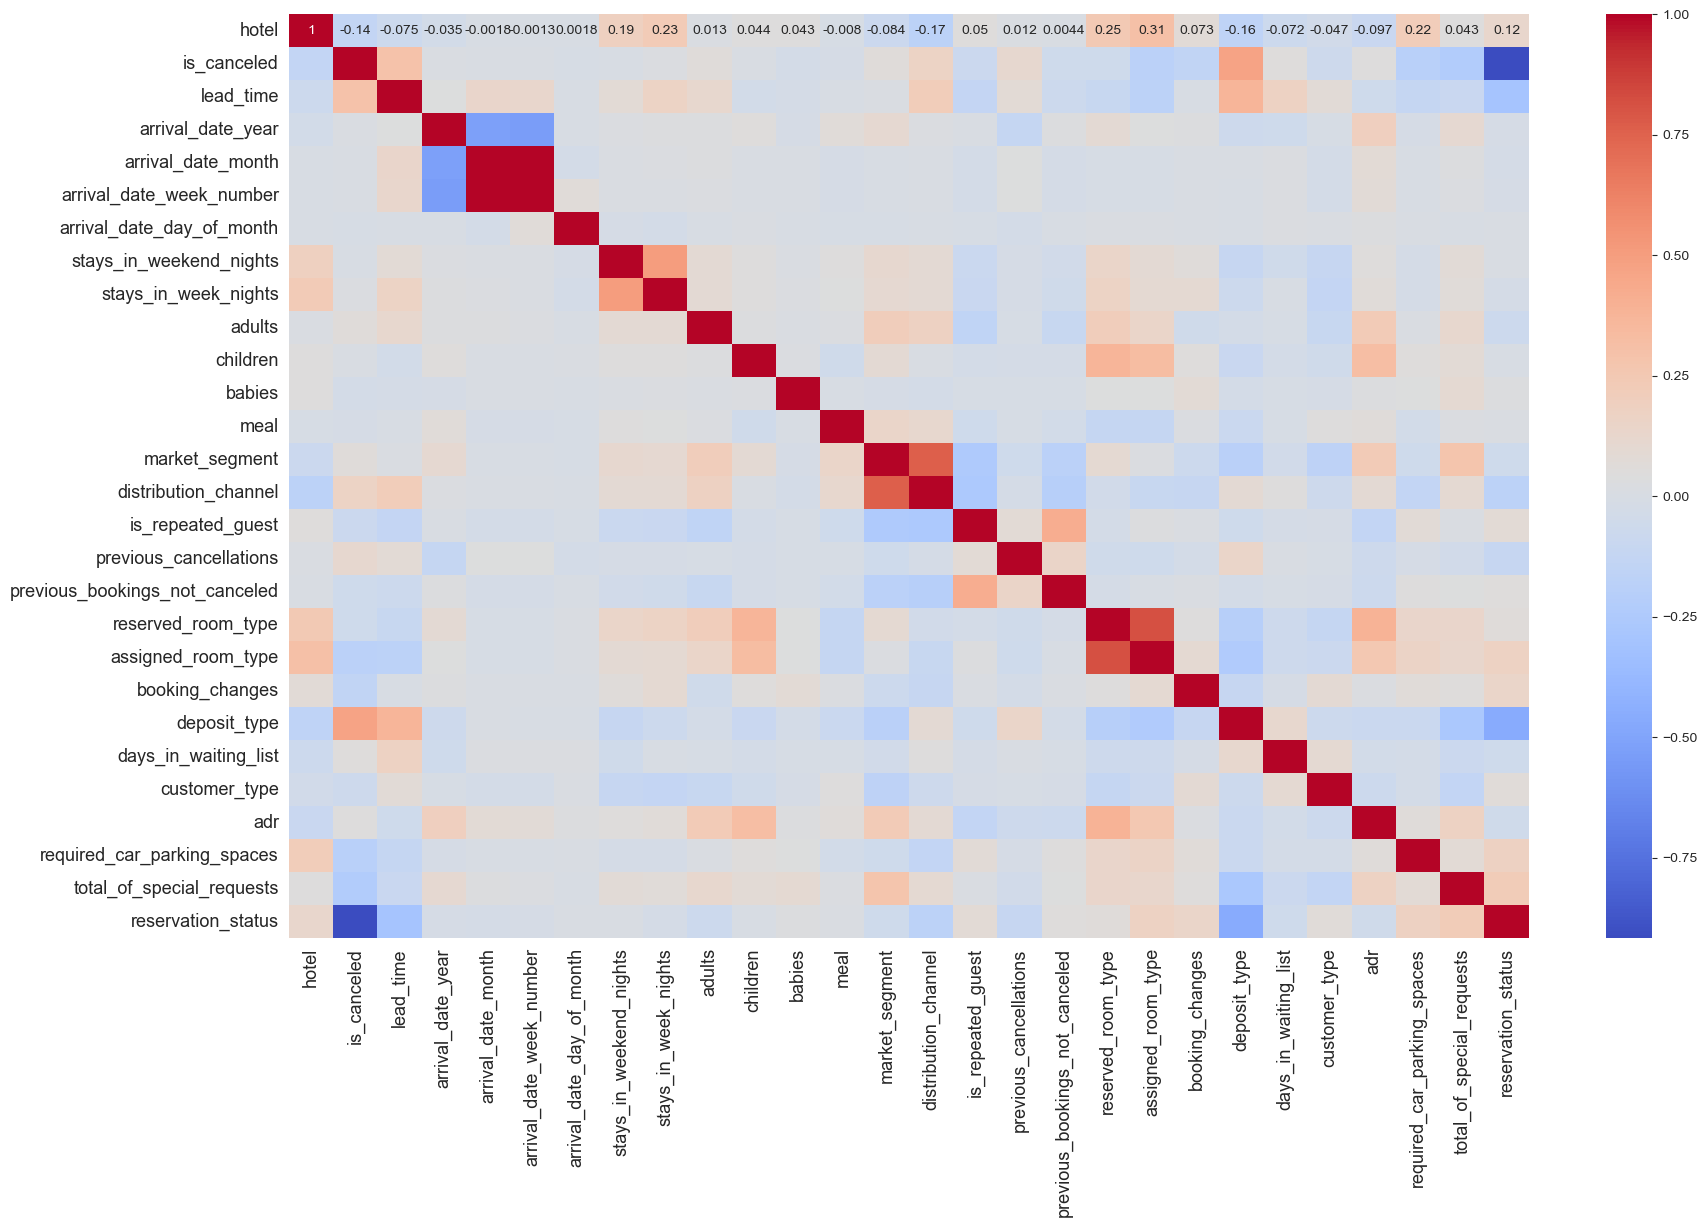

In [25]:
corr = df.corr()
plt.figure(figsize=(20, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

['No Deposit' 'Non Refund' 'Refundable'] ['Canceled' 'Check-Out' 'No-Show']


E:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


([<matplotlib.axis.XTick at 0x23725aa9d10>,
 [Text(0, 0, 'No Deposit'),
  Text(1, 0, 'Non Refund'),
  Text(2, 0, 'Refundable')])

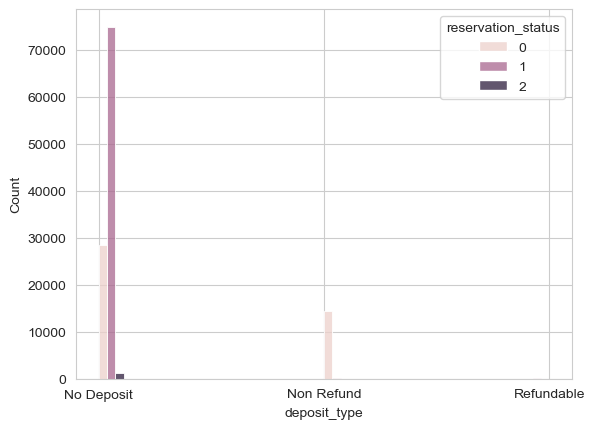

In [26]:
sns.histplot(data=df, x='deposit_type', hue='reservation_status', multiple='dodge')
print(labels['deposit_type'], labels['reservation_status'])
plt.xticks(ticks=range(0,3,1), labels=labels['deposit_type'])

In [27]:
df.drop(index=df[df['distribution_channel'] == 4].index, inplace=True)
labels['distribution_channel'] = np.delete(labels['distribution_channel'], 4)

E:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


([<matplotlib.axis.XTick at 0x23725ae2690>,
 [Text(0, 0, 'Corporate'),
  Text(1, 0, 'Direct'),
  Text(2, 0, 'GDS'),
  Text(3, 0, 'TA/TO')])

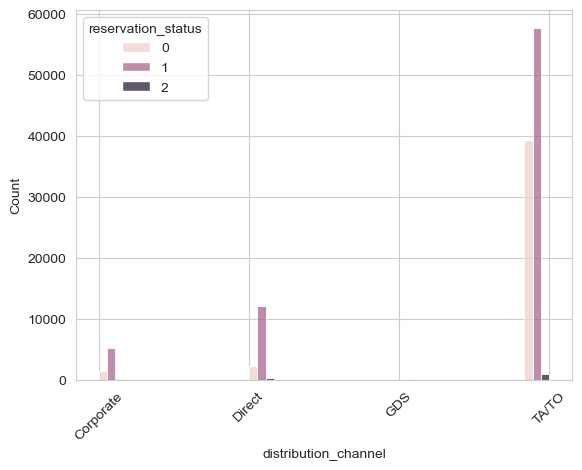

In [28]:
sns.histplot(data=df, x='distribution_channel', hue='reservation_status', multiple='dodge')
plt.xticks(ticks=range(labels['distribution_channel'].size) ,labels=labels['distribution_channel'], rotation=45)

# Model Building

In [29]:
from sklearn.neighbors import KNeighborsClassifier
#train test split
from sklearn.model_selection import train_test_split

x = df.drop(columns=['reservation_status'], axis=1)
y = df['reservation_status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2)
print(x_train.shape)
print(x_test.shape)

(89538, 27)
(29847, 27)


In [30]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [31]:
knn.score(x_test, y_test)

0.7820216437162864

In [32]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [33]:
rfc.score(x_test, y_test)

0.9923945455154622

In [34]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [35]:
gnb.score(x_test, y_test)

0.7855395852179449

In [46]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='sag', max_iter=2000)
lr.fit(x_train, y_train)

E:\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=2000, solver='sag')

In [47]:
lr.score(x_test, y_test)

0.989848225952357

In [48]:
from sklearn.metrics import classification_report
y_pred = lr.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     10793
           1       1.00      1.00      1.00     18755
           2       0.00      0.00      0.00       299

    accuracy                           0.99     29847
   macro avg       0.66      0.67      0.66     29847
weighted avg       0.98      0.99      0.98     29847


In [49]:
y_pred = rfc.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     10793
           1       1.00      1.00      1.00     18755
           2       0.91      0.27      0.41       299

    accuracy                           0.99     29847
   macro avg       0.96      0.76      0.80     29847
weighted avg       0.99      0.99      0.99     29847


In [50]:
y_pred = knn.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.65      0.69     10793
           1       0.80      0.87      0.84     18755
           2       0.66      0.10      0.17       299

    accuracy                           0.78     29847
   macro avg       0.73      0.54      0.56     29847
weighted avg       0.78      0.78      0.78     29847


In [52]:
y_pred = gnb.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.41      0.58     10793
           1       1.00      1.00      1.00     18755
           2       0.04      0.97      0.08       299

    accuracy                           0.79     29847
   macro avg       0.68      0.79      0.55     29847
weighted avg       0.99      0.79      0.84     29847
